In [117]:
import numpy as np
import basix
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import numpy as np
import matplotlib.pyplot as plt
import bbax

In [119]:
factor = 3.0
m_cm = 1/100
water = (np.array([15.2090, 24.4140]) * m_cm,
         np.array([[[5.5069 , 0.0   ],
                  [6.6227, 11.4080]],
                  [[3.4757 /factor,  0.0    /factor],
                   [3.7043 /factor,  6.7420 /factor]]]) * m_cm)

iron = (np.array([30.3110, 26.8760]) * m_cm,
        np.array([[[18.250, 0.0   ],
                   [6.4496, 21.3570]],
                  [[13.0890  /factor ,  0.0  /factor],
                   [-0.010523/factor ,7.0373 /factor]]]) * m_cm
)

void = (np.array([0.0, 0.0]),
        np.array([[[0.0, 0.0],
                   [0.0, 0.0]],
                  [[0.0, 0.0],    
                   [0.0, 0.0]]]))

source = np.array([0.097702, 0.45451])
zero_source = np.array([0.0, 0.0])

def truncate_XS(l_max):
    def truncate_XS_(xs):
        return (xs[0][:l_max+1], xs[1][:l_max+1])
    return truncate_XS_





In [120]:

lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
N_max = 3

regions = [
    (20, *water, zero_source), 
    (10, *water, source ),
    (50, *water, zero_source),
    (20, *iron,  zero_source),
    (10, *void, zero_source),
    (10, *water, zero_source),
    (10, *void,  zero_source)
]
elements_per_cm = 1


nodes, sigma_t, sigma_s, q = bbax.FEM1D.build_multigroup_elements_and_materials(regions, elements_per_cm, N_max, lagrange.dim)

In [121]:
dpn_prob = bbax.DPN.DPN_Problem.from_regions(regions, elements_per_cm, N_max, lagrange, L_scat=1)
dpn_prob.Solve_Multigroup_System("vacuum", 2)

array([1.65285045e-02, 1.95249068e-02, 2.30383084e-02, ...,
       1.20987873e-08, 1.20987873e-08, 1.20987873e-08], shape=(10416,))

In [122]:
pn_prob = bbax.PN.PN_Problem.from_regions(regions, elements_per_cm, N_max, lagrange, L_scat =1)
pn_prob.Solve_Multigroup_System("marshak", 2)


array([8.08201139e-03, 9.96836777e-03, 1.20422649e-02, ...,
       1.67437870e-08, 1.67437870e-08, 1.67437870e-08], shape=(5208,))

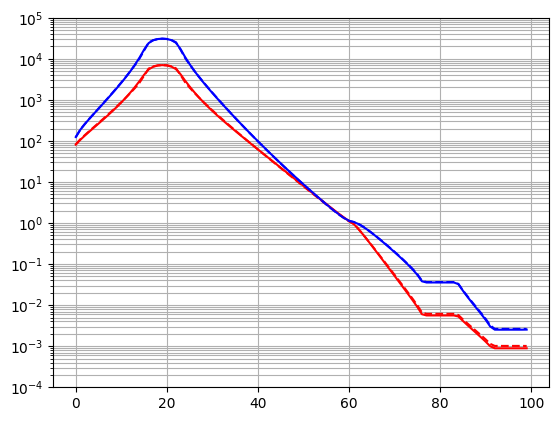

In [123]:
plt.semilogy(1e4 *(pn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, k = 0)),'r')
plt.semilogy(1e4 *(pn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, k = 0)),'b')


plt.semilogy(1e4 * 0.5 *(dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, mu_sign = 1, k = 0) + dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, mu_sign = -1, k = 0)),'r--')
plt.semilogy(1e4 * 0.5 *(dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, mu_sign = 1, k = 0) + dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, mu_sign = -1, k = 0)),'b--')

plt.ylim(1e-4,1e5)
plt.grid(which='both')

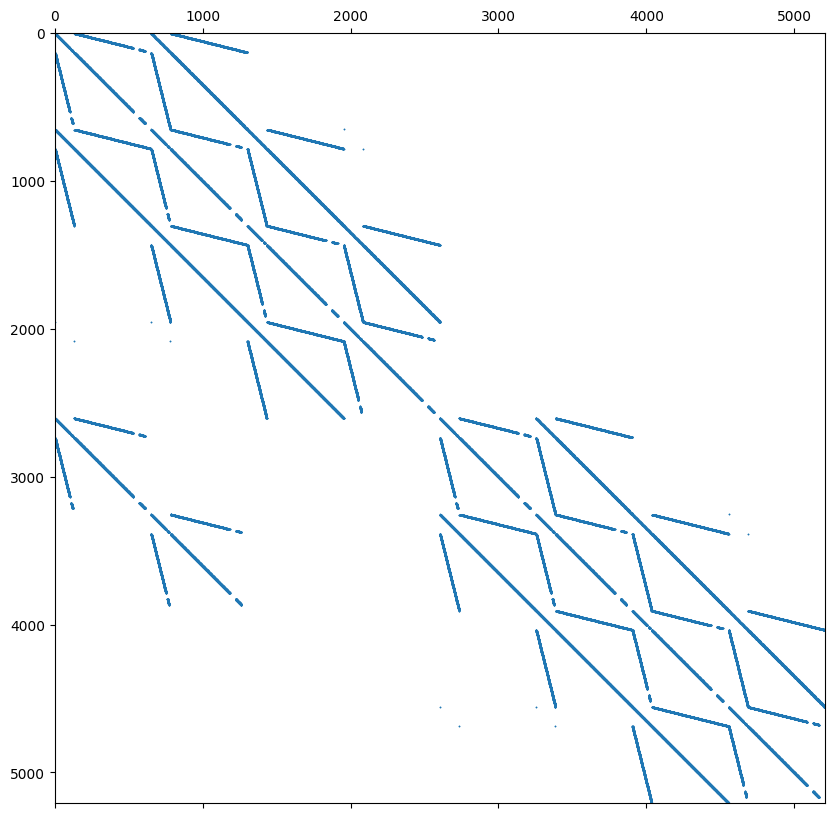

In [128]:
plt.figure(figsize=(10, 10))

plt.spy(pn_prob.assemble_multigroup_system("marshak",2)[0], markersize=0.4)


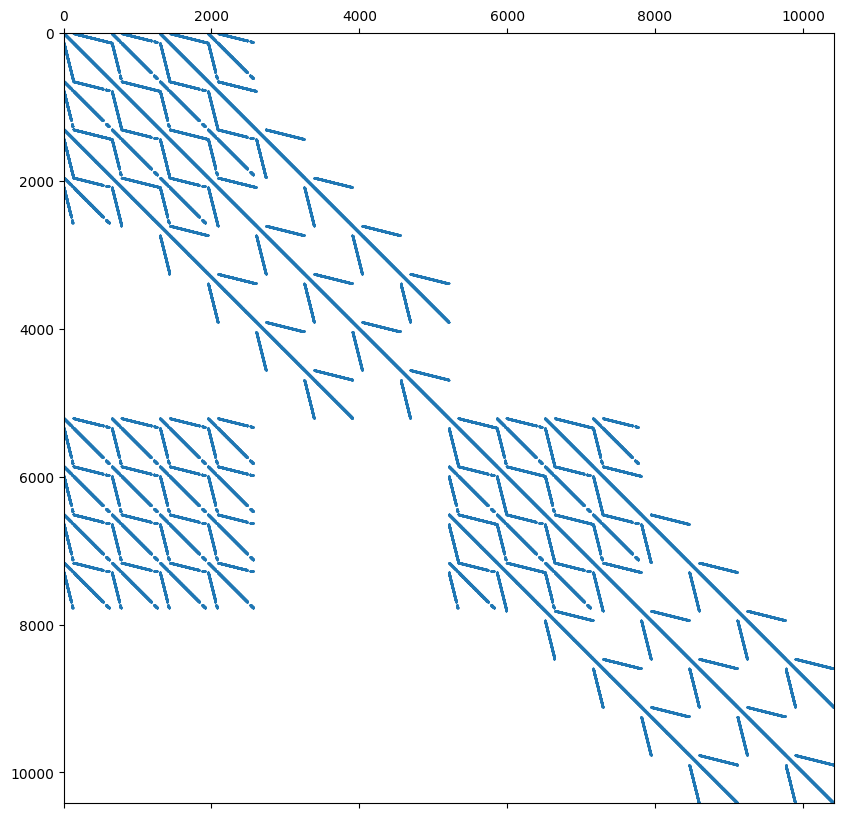

In [127]:
plt.figure(figsize=(10, 10))

plt.spy(dpn_prob.assemble_multigroup_system("vacuum",2)[0], markersize=0.4)
